In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import os

In [ ]:
model_path = 'seq20.h5'

In [4]:
df_train = pd.read_csv("train_FD002.txt",
                       sep=' ', header=None)
column_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9',
                's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
column_names_described = ['id',
                          'number of cycles',
                          'condition 1',
                          'condition 2',
                          'condition 3',
                          'T2 Total temperature at fan inlet °R',
                          'T24 Total temperature at LPC outlet °R',
                          '30 Total temperature at HPC outlet °R',
                          '50 Total temperature at LPT outlet °R',
                          'P2 Pressure at fan inlet psia',
                          'P15 Total pressure in bypass-duct psia',
                          'P30 Total pressure at HPC outlet psia',
                          'Nf Physical fan speed rpm',
                          'Nc Physical core speed rpm',
                          'epr Engine pressure ratio (P50/P2) --',
                          'Ps30 Static pressure at HPC outlet psia',
                          'phi Ratio of fuel flow to Ps30 pps/psi',
                          'NRf Corrected fan speed rpm',
                          'NRc Corrected core speed rpm',
                          'BPR Bypass Ratio --',
                          'farB Burner fuel-air ratio --',
                          'htBleed Bleed Enthalpy --',
                          'Nf_dmd Demanded fan speed rpm',
                          'PCNfR_dmd Demanded corrected fan speed rpm',
                          'W31 HPT coolant bleed lbm/s',
                          'W32 LPT coolant bleed lbm/s']

In [5]:
df_train.drop(df_train.columns[27], axis=1, inplace = True)

In [6]:
df_train.drop(df_train.columns[26], axis =1, inplace = True)

In [7]:
%config IPCompleter.greedy=True

In [8]:
df_train.columns = column_names

In [9]:
indexs_names = ['id', 'cycle']
sesnor_measure_column_names = ["s"+str(i) for i in range(1,22)]
operational_setting_names = ["setting"+str(i) for i in range(1,4)]
rul = ["RUL"]

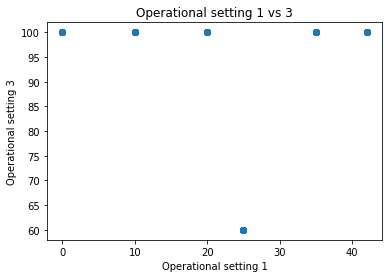

In [10]:
plot1 = plt.scatter(x=df_train["setting1"], y=df_train["setting3"])
plt.xlabel('Operational setting 1')
plt.ylabel('Operational setting 3')
plt.title('Operational setting 1 vs 3')
plt.savefig('Operational setting 1 vs 3.png')

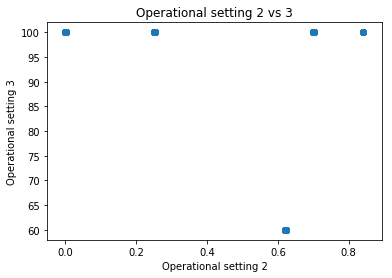

In [11]:
plot1 = plt.scatter(x=df_train["setting2"], y=df_train["setting3"])
plt.xlabel('Operational setting 2')
plt.ylabel('Operational setting 3')
plt.title('Operational setting 2 vs 3')
plt.savefig('Operational setting 2 vs 3.png')

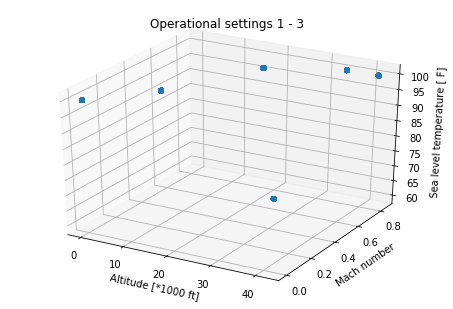

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_train['setting1'], df_train['setting2'], df_train['setting3'])
ax.set_title('Operational settings 1 - 3')
ax.set_xlabel("Altitude [*1000 ft]")
ax.set_ylabel("Mach number")
ax.set_zlabel("Sea level temperature [ F]")

plt.savefig('operational_settings.png')
plt.show()


In [13]:
rul = pd.DataFrame(df_train.groupby("id")["cycle"].max()).reset_index()
rul.columns = ["id", 'max']
df_train = df_train.merge(rul, on=["id"], how='left')
df_train["RUL"] = df_train['max'] - df_train['cycle']
df_train.drop('max', axis=1, inplace=True)

In [1]:
import seaborn as sns
g = sns.PairGrid(data=df_train.query('id <3') ,
                 x_vars=["RUL"],
                 y_vars=df_train.columns.difference(['id', 'cycle','RUL']),
                 hue="id", size=5, aspect=3.5)
            

g = g.map(plt.scatter, alpha=0.7)
# g = g.set(xlim=(300,0))
g.fig.tight_layout()
g = g.add_legend()

NameError: name 'df_train' is not defined

In [14]:
cols_normalize = df_train.columns.difference(['id', 'cycle','RUL'])
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
norm_df_train = pd.DataFrame(min_max_scaler.fit_transform(df_train[cols_normalize]),
                            columns=cols_normalize,
                            index = df_train.index)
join_df_train = df_train[df_train.columns.difference(cols_normalize)].join(norm_df_train)
df_train_normalized = join_df_train.reindex(columns=df_train.columns)


In [15]:
df_train_oper_set_norm = df_train_normalized[['setting1','setting2','setting3']]

# # Cluster - finding operational conditions

In [16]:
cluster_names = ['class_'+str(i) for i in range(1,7)]
cluster_names

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 6, random_state=1)
k_means_6 = KMeans(n_clusters=6, random_state=1)

k_means.fit(df_train_oper_set_norm[['setting1','setting2', 'setting3']])

k_means_6.fit(df_train[['setting1','setting2', 'setting3']])

labels = k_means.labels_
centroids = k_means.cluster_centers_

labels_6 = k_means_6.labels_
centroids_6 = k_means_6.cluster_centers_

In [17]:
labels

array([0, 5, 2, ..., 2, 2, 0])

In [18]:
pd.crosstab(cluster_names, labels)

,,,,,col_0,0,1,2,3,4,5
row_0,row_1,row_2,row_3,row_4,row_5,,,,,,
class_1,class_2,class_3,class_4,class_5,class_6,8037,8044,8002,8122,8096,13458


In [19]:
pd.crosstab(cluster_names, labels_6)

,,,,,col_0,0,1,2,3,4,5
row_0,row_1,row_2,row_3,row_4,row_5,,,,,,
class_1,class_2,class_3,class_4,class_5,class_6,8037,8044,8002,8122,8096,13458


In [20]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

centroids

array([[0.833247, 0.998219, 1.000000],
       [0.000036, 0.000587, 1.000000],
       [0.595197, 0.736938, -0.000000],
       [0.476171, 0.831966, 1.000000],
       [0.238121, 0.297500, 1.000000],
       [0.999880, 0.998201, 1.000000]])

In [21]:
centroids_6

array([[35.003049, 0.840501, 100.000000],
       [0.001505, 0.000494, 100.000000],
       [25.003038, 0.620502, 60.000000],
       [20.002999, 0.700515, 100.000000],
       [10.002971, 0.250495, 100.000000],
       [42.002976, 0.840485, 100.000000]])

## Centroids (centroids_6 - without scaling) gives more or less information which corresponds to how clusters look like. First column-altitude, second - Mach Number, third - temperature.

D:\anaconda_python\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


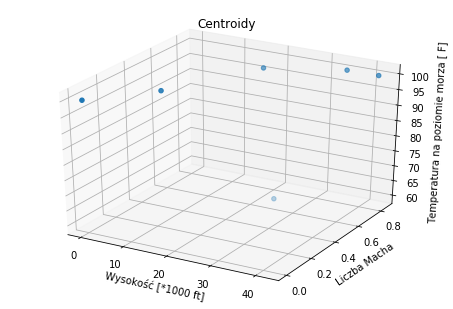

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig4 = plt.figure()
ax = Axes3D(fig4)

ax.scatter(centroids_6[:,0], centroids_6[:,1], centroids_6[:,2], 'r' )
ax.set_title('Centroidy')
ax.set_xlabel("Wysokość [*1000 ft]")
ax.set_ylabel("Liczba Macha")
ax.set_zlabel("Temperatura na poziomie morza [ F]")
plt.tight_layout()
plt.savefig('centroidy.png')
plt.show()


In [34]:
df_train_oper_set_norm_class = df_train_oper_set_norm
df_train_oper_set_norm_class['class'] = labels
df_train_class = df_train
df_train_class['class']=labels


D:\anaconda_python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
df_train_class.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,operational_label,class
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,9.3461,0.02,334,2223,100.00,14.73,8.8071,148,0,0
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,9.3774,0.02,330,2212,100.00,10.41,6.2665,147,5,5
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,10.8941,0.02,309,1915,84.93,14.08,8.6723,146,2,2
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,9.3528,0.02,329,2212,100.00,10.59,6.4701,145,5,5
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,10.8963,0.02,309,1915,84.93,14.13,8.5286,144,2,2


D:\anaconda_python\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


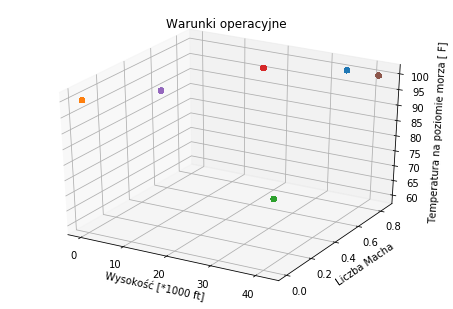

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure()
ax2 = Axes3D(fig2)
for i in range(0,6):
    ax2.scatter(df_train_class['setting1'].loc[df_train_class['class']==i],
               df_train_class['setting2'].loc[df_train_class['class']==i],
               df_train_class['setting3'].loc[df_train_class['class']==i])
#ax2.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker='x' )
ax2.set_title('Warunki operacyjne')
ax2.set_xlabel("Wysokość [*1000 ft]")
ax2.set_ylabel("Liczba Macha")
ax2.set_zlabel("Temperatura na poziomie morza [ F]")

plt.tight_layout()
plt.savefig('operational_settings_class_1.png')
plt.show()


## PCA, .fit  only to training data, after it need to apply mapping(.transform) both to training and test data. From explained variance ratio : 0.88 + 0.07 = 0.95 That means first component containds 88% of the varinace, second 7% of the variance, together 2 componenets gather 95% of information.

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
operational_set_norm_2d = pca.fit_transform(df_train_oper_set_norm)

In [34]:
pca.explained_variance_ratio_

array([0.899716, 0.064967])

In [35]:
pca.n_components_

2

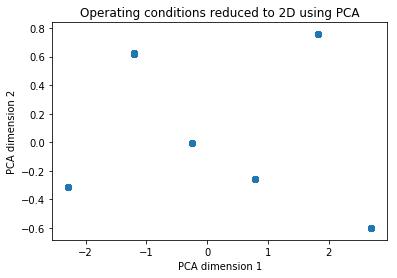

In [36]:
fig3 = plt.figure()
plt.scatter(operational_set_norm_2d[:,0], operational_set_norm_2d[:,1])
plt.xlabel("PCA dimension 1")
plt.ylabel("PCA dimension 2")
plt.title("Operating conditions reduced to 2D using PCA")
plt.savefig("operating_conditions_2d_pca")

In [25]:
df_train_labeled = df_train
df_train_labeled['operational_label'] = labels

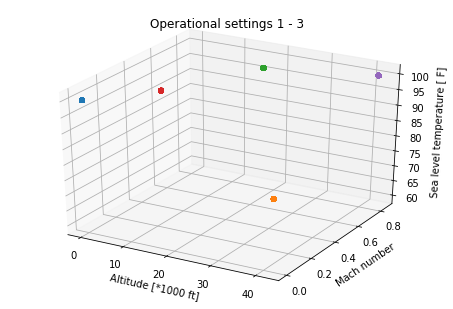

In [45]:
from mpl_toolkits.mplot3d import Axes3D
fig5 = plt.figure()
ax2 = Axes3D(fig5)
for i in range(1,7):
    ax2.scatter(df_train_labeled['setting1'].loc[df_train_labeled['operational_label']==i],
               df_train_labeled['setting2'].loc[df_train_labeled['operational_label']==i],
               df_train_labeled['setting3'].loc[df_train_labeled['operational_label']==i])
#ax2.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker='x' )
ax2.set_title('Operational settings 1 - 3')
ax2.set_xlabel("Altitude [*1000 ft]")
ax2.set_ylabel("Mach number")
ax2.set_zlabel("Sea level temperature [ F]")
ax2.set_xmargin(1)
ax2.set_ymargin(1)
ax2.set_zmargin(1)
plt.savefig('operational_settings_class_2.png')
plt.show()


In [39]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf_oper_set = ExtraTreesClassifier(n_estimators = 100)
clf_oper_set = clf_oper_set.fit(df_train_oper_set_norm_class[['setting1', 'setting2', 'setting3']],
                                df_train_oper_set_norm_class[['class']])
oper_set_feature_importance = clf_oper_set.feature_importances_
oper_set_feature_importance

D:\anaconda_python\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([0.515396, 0.346621, 0.137983])

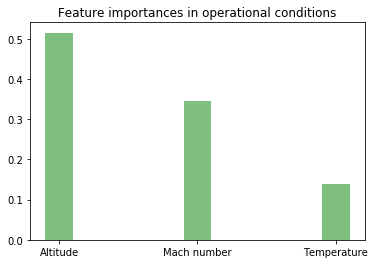

In [40]:
plt.figure()
plt.title("Feature importances in operational conditions")
plt.bar([x for x in range(1,4)], oper_set_feature_importance, color = 'g', align = 'center', width =0.2, alpha = 0.5 )
plt.grid = True
plt.xticks([x for x in range(1,4)], ( 'Altitude', 'Mach number', 'Temperature'))
plt.savefig('feature importance in operational conditions ')
plt.show()

In [174]:
df_train_norm_label.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,operational_label,cycle_norm
0,1,1,0.833134,0.997625,1.0,0.060269,0.181576,0.311201,0.273095,0.146592,...,0.369947,0.0,0.322917,0.651163,1.0,0.156036,0.159082,148,0.0,0.000000
1,1,2,0.999767,0.998575,1.0,0.000000,0.131847,0.296600,0.245535,0.000000,...,0.381407,0.0,0.281250,0.627907,1.0,0.007888,0.014562,147,1.0,0.002653
2,1,3,0.595096,0.738480,0.0,0.238089,0.016332,0.035297,0.056997,0.293184,...,0.936731,0.0,0.062500,0.000000,0.0,0.133745,0.151414,146,0.4,0.005305
3,1,4,0.999993,0.999525,1.0,0.000000,0.128269,0.298795,0.246979,0.000000,...,0.372400,0.0,0.270833,0.627907,1.0,0.014060,0.026144,145,1.0,0.007958
4,1,5,0.595137,0.736698,0.0,0.238089,0.014130,0.037871,0.058152,0.293184,...,0.937537,0.0,0.062500,0.000000,0.0,0.135460,0.143240,144,0.4,0.010610


In [ ]:
import seaborn as sns
g = sns.PairGrid(data=df_train_norm_label.query('id <15') ,
                 x_vars=["setting1"],
                 y_vars=df_train_norm_label.columns.difference(['id', 'cycle','RUL','setting1']),
                 hue="id", size=5, aspect=2.5)
g = g.map(plt.scatter, alpha=0.5)
g = g.set(xlim=(300,0))
g = g.add_legend()

##   chapter 3 basic linear regression using LSTM

# 1 train data preparation

In [41]:
df_test = pd.read_csv("test_FD002.txt",
                       sep=' ', header=None)

In [42]:
df_test.drop(df_test.columns[[26,27]], axis=1, inplace=True)
df_test.columns = column_names

In [43]:
df_truth = pd.read_csv("RUL_FD002.txt", sep=' ', header = None)
df_truth.drop(df_truth[[1]], axis=1, inplace = True)
df_train['cycle_norm'] = df_train['cycle']

In [44]:
df_train_cols_normalized_label = df_train.columns.difference(['id','cycle','RUL'])
df_train_norm_label = pd.DataFrame(min_max_scaler.fit_transform(df_train[df_train_cols_normalized_label]), 
                             columns=df_train_cols_normalized_label,
                             index=df_train.index)
join_df_2 = df_train[df_train.columns.difference(df_train_cols_normalized_label)].join(df_train_norm_label)
df_train_norm_label = join_df_2.reindex(columns = df_train.columns)

In [46]:
df_test_oper_set = df_test[['setting1','setting2','setting3']]

In [47]:
min_max_scaler_test = preprocessing.MinMaxScaler()
min_max_scaler_test.fit(df_test_oper_set)
df_test_oper_set_norm = pd.DataFrame(min_max_scaler_test.transform(df_test[['setting1','setting2','setting3']]), 
                            columns=df_test_oper_set.columns, 
                            index=df_test_oper_set.index)

In [48]:
prediction_test = k_means.predict(df_test_oper_set_norm)

In [49]:
prediction_test

array([4, 3, 0, ..., 5, 1, 5])

In [50]:
df_test_oper_set_norm_label = df_test_oper_set_norm
df_test_oper_set_norm_label['operational_label'] = prediction_test
df_test_oper_set_norm_label.head()
df_test_label = df_test
df_test_label['operational_label'] = prediction_test